<a href="https://colab.research.google.com/github/dhruvjha206/Mech-Prop-using-ML/blob/main/Al6061_300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **For Aluminium 6061 Alloy at 300°C**

In [3]:
# Importing Important Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas.testing as tm
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as slm

### Data Preparation

About the Data Set

The dataset is stress-strain ( Tensile and Microindentation ) of Aluminium 6061 Alloy under uniaxial and plain strain tension at 6 different temperatures.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading csv
path = "/content/drive/MyDrive/Al6061_300.csv"
df = pd.read_csv(path, encoding= 'unicode_escape')

Dataset

In [5]:
df = df.drop([df.index[172]])
df

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type
0,Al6061,300,0.000010,12.079138,Uniaxial tension
1,Al6061,300,0.000014,16.434872,Uniaxial tension
2,Al6061,300,0.000042,20.655593,Uniaxial tension
3,Al6061,300,0.000088,24.692543,Uniaxial tension
4,Al6061,300,0.000156,32.572543,Uniaxial tension
...,...,...,...,...,...
167,Al6061,300,0.202707,31.684522,Uniaxial tension
168,Al6061,300,0.204087,30.375105,Uniaxial tension
169,Al6061,300,0.204794,29.760183,Uniaxial tension
170,Al6061,300,0.205481,29.138776,Uniaxial tension


Finding Missing Values in the Data Set

In [6]:
df.isnull().sum()

Alloy_Name       0
Temp (°C)        0
Strain           0
Stress_MPa       0
Specimen_Type    0
dtype: int64

Let's Do Some Exploratory Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alloy_Name     172 non-null    object 
 1   Temp (°C)      172 non-null    int64  
 2   Strain         172 non-null    float64
 3   Stress_MPa     172 non-null    float64
 4   Specimen_Type  172 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.1+ KB


In [8]:
df.describe()

,Temp (°C),Strain,Stress_MPa
count,172.0,172.000000,172.000000
mean,300.0,0.088707,61.620573
std,0.0,0.064242,15.729772
min,300.0,0.000010,12.079138
25%,300.0,0.031023,52.489371
50%,300.0,0.081618,63.503229
75%,300.0,0.142615,73.762968
max,300.0,0.206184,84.225216


Data Plotting (Stress-strain curve)

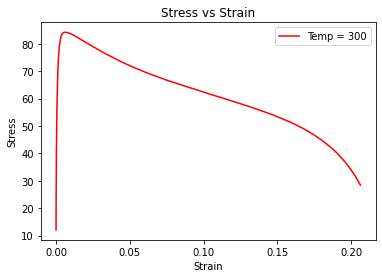

In [9]:
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Temp = 300')
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

In [10]:
row = df.shape[0]
col = df.shape[1]

For finding **PROPORTIONAL LIMIT**, we need to find **Linear Regression line** with **good accuracy**:

In [11]:
# Plotting multiple Regression lines and finding their accuracy 
import random
prop_lim = random.randint(0,row)

for i in range(2, row):
  #Change to DataFrame 
  x = pd.DataFrame(df.loc[0:i , ['Strain']])
  y = pd.DataFrame(df.loc[0:i , ['Stress_MPa']])

  model = LinearRegression().fit(x, y)
  y_new = model.predict(x)

  acc = round(slm.r2_score(y, y_new), 2)
  if acc >= 0.8 :
    prop_lim = i
prop_lim   

13

In [12]:
x1 = df.loc[[prop_lim]].Strain
y1 = df.iloc[[prop_lim]].Stress_MPa

### Building Regression model

In [13]:
x = pd.DataFrame(df.loc[0:prop_lim , ['Strain']])
y = pd.DataFrame(df.loc[0:prop_lim , ['Stress_MPa']])

model = LinearRegression().fit(x, y)
y_new = model.predict(x)

Plotting Regression line and Proportional limit

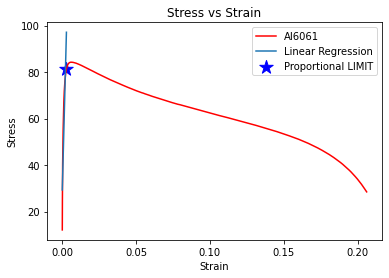

In [14]:
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Al6061')
plt.plot(x, y_new, label='Linear Regression' )
plt.scatter(x1,y1,color='b',marker='*',s=200, label = 'Proportional LIMIT')
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

In [15]:
# For Fracture Point
x4 = df.loc[[row-2]].Strain
y4 = df.loc[[row-2]].Stress_MPa

For the ultimate tensile strength:

In [16]:
max_Stress = df.iloc[df['Stress_MPa'].idxmax()]
x3 = max_Stress['Strain']
y3 = max_Stress['Stress_MPa']

Finding Yield Point using offset method

In [17]:
#Taking 0.2% as offset
df["Offset"] = df["Strain"] + 0.002
df

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type,Offset
0,Al6061,300,0.000010,12.079138,Uniaxial tension,0.002010
1,Al6061,300,0.000014,16.434872,Uniaxial tension,0.002014
2,Al6061,300,0.000042,20.655593,Uniaxial tension,0.002042
3,Al6061,300,0.000088,24.692543,Uniaxial tension,0.002088
4,Al6061,300,0.000156,32.572543,Uniaxial tension,0.002156
...,...,...,...,...,...,...
167,Al6061,300,0.202707,31.684522,Uniaxial tension,0.204707
168,Al6061,300,0.204087,30.375105,Uniaxial tension,0.206087
169,Al6061,300,0.204794,29.760183,Uniaxial tension,0.206794
170,Al6061,300,0.205481,29.138776,Uniaxial tension,0.207481


Building regression model for Yield Strength

In [19]:
x = pd.DataFrame(df.loc[0:prop_lim , ['Strain']])
y = pd.DataFrame(df.loc[0:prop_lim , ['Stress_MPa']])

model = LinearRegression().fit(x, y)
y_new = model.predict(x)

xx = pd.DataFrame(df.loc[0:prop_lim, ['Offset']])
yy = pd.DataFrame(df.loc[0:prop_lim, ['Stress_MPa']])

model = LinearRegression().fit(xx, yy)
yy_new = model.predict(xx)

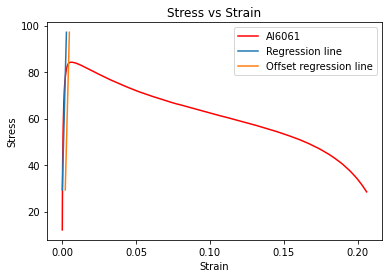

In [20]:
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Al6061')
plt.plot(x, y_new, label='Regression line' )
plt.plot(xx, yy_new, label='Offset regression line' )
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

Finding the yield point:

In [21]:
for i in range (5, row):
  if(df.iloc[prop_lim]['Offset'] <= df.iloc[i]['Strain']) :
    x2 = df.loc[i].Strain
    y2 = df.loc[i].Stress_MPa
    break

### **Concluded PLOT**

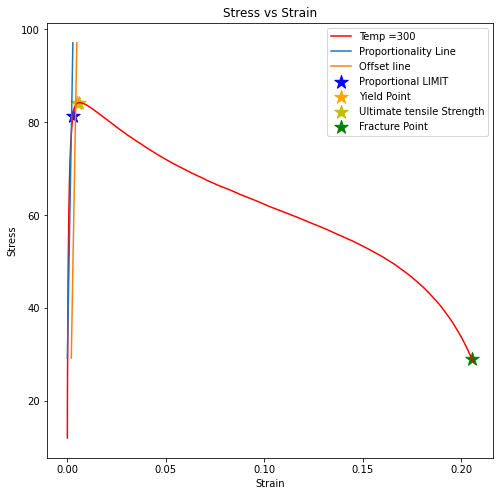

In [22]:
plt.subplots(figsize=[8,8])
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Temp =300')
plt.scatter(x1,y1,color='b',marker='*',s=200, label = 'Proportional LIMIT')
plt.scatter(x2,y2,color='orange',marker='*',s=200, label = 'Yield Point')
plt.scatter(x3,y3,color='y',marker='*',s=200, label = 'Ultimate tensile Strength')
plt.scatter(x4,y4,color='g',marker='*',s=200, label = 'Fracture Point')
plt.plot(x, y_new, label='Proportionality Line')
plt.plot(xx, yy_new, label='Offset line' )
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

**Results for Al6061 at 300°C:**

In [23]:
print('Proportional limit :' ,df.iloc[prop_lim]['Stress_MPa'] ,'MPa')
print('Yield Point :' ,df.iloc[i]['Stress_MPa'] ,'MPa')
print('Ultimate tensile strength :' , y3 ,'MPa')
print('Fracture point :' ,df.iloc[row-1]['Stress_MPa'] ,'MPa')

Proportional limit : 81.24119282 MPa
Yield Point : 84.07652768 MPa
Ultimate tensile strength : 84.22521597 MPa
Fracture point : 28.44441026 MPa


Model Accuracy:

In [24]:
# Regression score function
print(slm.r2_score(y, y_new))

0.7997208860072752
